<a href="https://colab.research.google.com/github/provbs/LOLai_machine_learning/blob/main/LOL_Report_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4873456228373526210
]


In [ ]:
def ReadCSVandSavetoDF(filename): 
    
    df = pd.read_csv(filename)
    df = pd.DataFrame(df)
    return df

df1 = ReadCSVandSavetoDF('FINAL_match_to_rank_p1.csv')
df2 = ReadCSVandSavetoDF('FINAL_match_to_rank_p2.csv')
df3 = ReadCSVandSavetoDF('FINAL_match_to_rank_p3.csv')
df4 = ReadCSVandSavetoDF('FINAL_match_to_rank_p4.csv')

df = pd.concat([df1, df2, df3, df4])
#df = df1
df = df.sample(frac=1).reset_index(drop=True)


#is_top = df['individualPosition'] == 'UTILITY'
#df = df[is_top]

#필요없는 칼럼을 드랍해준다.
#df = df.drop(columns = ['Unnamed: 0', 'level_0', 'index', 'championName', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6'] , axis=1)
#df = df.drop(columns = ['lane', 'nexusTakedowns', 'participantId', 'perks', 'profileIcon', 'puuid', 'riotIdName', 'riotIdTagline', 'role'] , axis=1)
#df = df.drop(columns = ['summoner1Casts', 'summoner1Id', 'summoner2Id', 'summoner2Casts', 'summonerId', 'summonerName', 'teamId'] , axis=1)
#df = df.drop(columns = ['championId', 'bountyLevel', 'champLevel'] , axis=1)


df = df.drop(columns = ['Unnamed: 0', 'level_0', 'index','championName'
                       , 'champLevel', 'championTransform', 'damageSelfMitigated', 'gameEndedInEarlySurrender'
                        , 'gameEndedInSurrender', 'ServerRanking'
                       ,'item0','item1','item2','item3','item4','item5','item6','lane'
                       ,'nexusKills','nexusLost', 'nexusTakedowns','participantId', 'perks'
                       ,'profileIcon','puuid','quadraKills','riotIdName','riotIdTagline','role','sightWardsBoughtInGame'
                       , 'summoner1Id','summoner2Casts','summoner2Id','summonerId'
                        ,'summonerName','teamEarlySurrendered','teamId','teamPosition' ,'unrealKills'])

#필요한 칼럼을 추출해준다.
df_need_columns = []
df_need_columns = pd.DataFrame(df_need_columns)
df_need_columns = df
#df_need_columns = df[['assists'
#                       ,'baronKills'
#                       ,'champExperience'
#                       ,   'consumablesPurchased'
#                       ,    'damageDealtToBuildings'
#                          , 'damageDealtToObjectives'
#                           , 'damageDealtToTurrets'
#                          , 'deaths'
#                       , 'detectorWardsPlaced'
#                       , 'doubleKills'
#                          , 'dragonKills'
#                       , 'goldEarned'
#                       , 'goldSpent'
#                          , 'inhibitorKills'
#                       , 'inhibitorTakedowns' 
#                       , 'inhibitorsLost'
#                          , 'killingSprees'
#                       , 'kills'
#                       , 'longestTimeSpentLiving'
#                          , 'largestKillingSpree'
#                       , 'largestMultiKill'
#                          , 'magicDamageDealt'
#                       , 'magicDamageDealtToChampions'
#                          , 'magicDamageTaken'
#                       , 'neutralMinionsKilled'
#                          , 'objectivesStolen'
#                       , 'objectivesStolenAssists'
#                          , 'pentaKills'
#                       , 'physicalDamageDealt'
#                          , 'physicalDamageDealtToChampions'
#                       , 'physicalDamageTaken'
#                          , 'quadraKills'
#                          , 'spell4Casts' 
#                       , 'timeCCingOthers'
#                          , 'timePlayed'
#                          , 'totalDamageDealt' 
#                       , 'totalDamageDealtToChampions'
#                          , 'totalDamageShieldedOnTeammates'
#                          , 'totalDamageTaken' 
#                       , 'totalHeal' 
#                       , 'totalHealsOnTeammates'
#                          , 'totalMinionsKilled' 
#                       , 'totalTimeCCDealt'
#                          , 'totalTimeSpentDead' 
#                       , 'tripleKills' 
#                       , 'trueDamageDealt'
#                          , 'trueDamageDealtToChampions' 
#                       , 'trueDamageTaken'
#                          , 'turretKills'
#                       , 'turretTakedowns'
#                       , 'turretsLost'
#                       , 'visionScore'
#                          , 'visionWardsBoughtInGame'
#                       , 'wardsKilled'
#                       , 'wardsPlaced' 
#                          , 'win']]

#df_need_columns = df[['assists', 'deaths', 'timePlayed', 'kills'
#                         , 'goldEarned', 'ServerRanking']]

#df_need_columns = df[['timePlayed', 'goldEarned', 'timeCCingOthers', 'totalTimeSpentDead' , 'win']]

#df_need_columns['timePlayed'] = df_need_columns['timePlayed'] / 60
df_need_columns['timePlayed'] = df_need_columns['timePlayed'] / 60

# 분당으로 계산해야 될 칼럼 계산 후 추가.
df_need_columns['damageDealtToBuildings'] = df_need_columns['damageDealtToBuildings'] / df_need_columns['timePlayed']
df_need_columns['damageDealtToObjectives'] = df_need_columns['damageDealtToObjectives'] / df_need_columns['timePlayed']
df_need_columns['damageDealtToTurrets'] = df_need_columns['damageDealtToTurrets'] / df_need_columns['timePlayed']
df_need_columns['detectorWardsPlaced'] = df_need_columns['detectorWardsPlaced'] / df_need_columns['timePlayed']
df_need_columns['assists'] = df_need_columns['assists'] / df_need_columns['timePlayed']
df_need_columns['deaths'] = df_need_columns['deaths'] / df_need_columns['timePlayed']
df_need_columns['kills'] = df_need_columns['kills'] / df_need_columns['timePlayed']
df_need_columns['goldEarned'] = df_need_columns['goldEarned'] / df_need_columns['timePlayed']
df_need_columns['goldSpent'] = df_need_columns['goldSpent'] / df_need_columns['timePlayed']
df_need_columns['magicDamageDealt'] = df_need_columns['magicDamageDealt'] / df_need_columns['timePlayed']
df_need_columns['magicDamageDealtToChampions'] = df_need_columns['magicDamageDealtToChampions'] / df_need_columns['timePlayed']
df_need_columns['magicDamageTaken'] = df_need_columns['magicDamageTaken'] / df_need_columns['timePlayed']
df_need_columns['physicalDamageDealt'] = df_need_columns['physicalDamageDealt'] / df_need_columns['timePlayed']
df_need_columns['physicalDamageDealtToChampions'] = df_need_columns['physicalDamageDealtToChampions'] / df_need_columns['timePlayed']
df_need_columns['physicalDamageTaken'] = df_need_columns['physicalDamageTaken'] / df_need_columns['timePlayed']
#df_need_columns['sightWardsBoughtInGame'] = df_need_columns['sightWardsBoughtInGame'] / df_need_columns['timePlayed']
df_need_columns['timeCCingOthers'] = df_need_columns['timeCCingOthers'] / df_need_columns['timePlayed']
df_need_columns['totalDamageDealt'] = df_need_columns['totalDamageDealt'] / df_need_columns['timePlayed']
df_need_columns['totalDamageDealtToChampions'] = df_need_columns['totalDamageDealtToChampions'] / df_need_columns['timePlayed']
df_need_columns['totalDamageShieldedOnTeammates'] = df_need_columns['totalDamageShieldedOnTeammates'] / df_need_columns['timePlayed']
df_need_columns['totalDamageTaken'] = df_need_columns['totalDamageTaken'] / df_need_columns['timePlayed']
df_need_columns['totalHeal'] = df_need_columns['totalHeal'] / df_need_columns['timePlayed']
df_need_columns['totalHealsOnTeammates'] = df_need_columns['totalHealsOnTeammates'] / df_need_columns['timePlayed']
df_need_columns['totalTimeCCDealt'] = df_need_columns['totalTimeCCDealt'] / df_need_columns['timePlayed']
df_need_columns['totalTimeSpentDead'] = df_need_columns['totalTimeSpentDead'] / df_need_columns['timePlayed']
df_need_columns['trueDamageDealt'] = df_need_columns['trueDamageDealt'] / df_need_columns['timePlayed']
df_need_columns['trueDamageDealtToChampions'] = df_need_columns['trueDamageDealtToChampions'] / df_need_columns['timePlayed']
df_need_columns['trueDamageTaken'] = df_need_columns['trueDamageTaken'] / df_need_columns['timePlayed']
df_need_columns['visionScore'] = df_need_columns['visionScore'] / df_need_columns['timePlayed']
df_need_columns['visionWardsBoughtInGame'] = df_need_columns['visionWardsBoughtInGame'] / df_need_columns['timePlayed']
df_need_columns['wardsKilled'] = df_need_columns['wardsKilled'] / df_need_columns['timePlayed']
df_need_columns['wardsPlaced'] = df_need_columns['wardsPlaced'] / df_need_columns['timePlayed']
df_need_columns['totalMinionsKilled'] = df_need_columns['totalMinionsKilled'] / df_need_columns['timePlayed']

## 중립몹에 cs더해주기
df_need_columns['totalMinionsKilled'] = df_need_columns['totalMinionsKilled'] + df_need_columns['neutralMinionsKilled']
df_need_columns = df_need_columns.drop(columns = ['neutralMinionsKilled'])


df_need_columns = df_need_columns.drop(columns = ['timePlayed'])


# win 값을 true/false 에서 1/0 으로 바꾸기.
df_need_columns["win"] = df_need_columns["win"].astype(int)

## true/false 값들 1/0으로 바꾸기
df_need_columns["firstBloodAssist"] = df_need_columns["firstBloodAssist"].astype(int)
df_need_columns["firstBloodKill"] = df_need_columns["firstBloodKill"].astype(int)
df_need_columns["firstTowerAssist"] = df_need_columns["firstTowerAssist"].astype(int)
df_need_columns["firstTowerKill"] = df_need_columns["firstTowerKill"].astype(int)


## 포지션별로 숫자 부여하기
#is_top = df_need_columns['individualPosition'] == 'TOP'
df_need_columns.loc[df_need_columns.individualPosition == 'TOP' , 'individualPosition'] = 1
df_need_columns.loc[df_need_columns.individualPosition == 'JUNGLE' , 'individualPosition'] = 2
df_need_columns.loc[df_need_columns.individualPosition == 'MIDDLE' , 'individualPosition'] = 3
df_need_columns.loc[df_need_columns.individualPosition == 'BOTTOM' , 'individualPosition'] = 4
df_need_columns.loc[df_need_columns.individualPosition == 'UTILITY' , 'individualPosition'] = 5
df_need_columns.drop(df_need_columns.loc[df_need_columns.individualPosition == 'Invalid' , 'individualPosition'].index, inplace=True)


df_need_columns.to_csv('data_to_learn_Before.csv', mode='w', encoding="utf-8-sig")


## 서버랭킹을 베이스로 티어 분별하여 적기.
# 1챌린저 2그마 3마스터 4다이아 5플레 6골드 7실버 8브론즈 9아이언

##1차 프로세스
# df_need_columns.loc[(df_need_columns.ServerRanking < 300) & (df_need_columns.ServerRanking >= 0) , 'ServerRanking'] = 1
# df_need_columns.loc[(df_need_columns.ServerRanking < 983) & (df_need_columns.ServerRanking >= 300) , 'ServerRanking'] = 2
# df_need_columns.loc[(df_need_columns.ServerRanking < 4075) & (df_need_columns.ServerRanking >= 983) , 'ServerRanking'] = 3
# df_need_columns.loc[(df_need_columns.ServerRanking < 27688) & (df_need_columns.ServerRanking >= 4075), 'ServerRanking'] = 4
# df_need_columns.loc[(df_need_columns.ServerRanking < 265119) & (df_need_columns.ServerRanking >= 27688) , 'ServerRanking'] = 5
# df_need_columns.loc[(df_need_columns.ServerRanking < 1244037) & (df_need_columns.ServerRanking >= 265119), 'ServerRanking'] = 6
# df_need_columns.loc[(df_need_columns.ServerRanking < 2961438) & (df_need_columns.ServerRanking >= 1244037) , 'ServerRanking'] = 7
# df_need_columns.loc[(df_need_columns.ServerRanking < 4047694) & (df_need_columns.ServerRanking >= 2961438) , 'ServerRanking'] = 8
# df_need_columns.loc[(df_need_columns.ServerRanking < 4239614) & (df_need_columns.ServerRanking >= 4047694) , 'ServerRanking'] = 9


#나중에 변환하고 없애기
df_need_columns = df_need_columns.dropna(axis='rows')
df_need_columns = df_need_columns.astype(float)


display(df_need_columns)

#df_need_columns.to_csv('Total_Data_Shuffled.csv', mode='w', encoding="utf-8-sig")
df_need_columns.to_csv('data_to_learn.csv', mode='w', encoding="utf-8-sig")

,assists,baronKills,bountyLevel,champExperience,championId,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,deaths,...,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,0.175131,0.0,0.0,12482.0,18.0,7.0,240.385289,240.385289,240.385289,0.175131,...,82.837128,50.963222,2.0,3.0,4.0,1.050788,0.140105,0.350263,0.315236,1.0
1,0.531287,0.0,0.0,10629.0,44.0,10.0,50.720189,91.239669,50.720189,0.035419,...,20.968123,4.887839,2.0,7.0,6.0,1.770956,0.283353,0.318772,0.814640,1.0
2,0.332594,0.0,0.0,10376.0,34.0,10.0,22.749446,62.560976,22.749446,0.266075,...,44.135255,46.463415,0.0,1.0,7.0,2.860310,0.232816,0.731707,1.430155,0.0
3,0.000000,0.0,0.0,9337.0,234.0,0.0,0.000000,81.368653,0.000000,0.220751,...,39.690949,95.320088,0.0,0.0,9.0,0.397351,0.000000,0.088300,0.000000,0.0
4,0.064586,0.0,0.0,5888.0,110.0,8.0,37.847147,37.847147,37.847147,0.258342,...,0.000000,9.300323,0.0,0.0,3.0,0.839612,0.193757,0.258342,0.516685,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135120,0.228426,0.0,0.0,10602.0,429.0,3.0,41.383249,138.045685,41.383249,0.190355,...,0.000000,37.347716,1.0,1.0,6.0,0.951777,0.076142,0.456853,0.266497,0.0
135121,0.250000,0.0,1.0,4877.0,223.0,8.0,28.250000,28.250000,28.250000,0.125000,...,19.062500,10.500000,0.0,1.0,0.0,1.187500,0.312500,0.250000,0.687500,1.0
135122,0.000000,0.0,2.0,8632.0,23.0,2.0,128.806366,327.108753,128.806366,0.265252,...,33.315650,82.175066,0.0,0.0,2.0,0.477454,0.053050,0.159151,0.159151,1.0
135123,0.124913,0.0,0.0,7922.0,96.0,1.0,0.000000,105.052047,0.000000,0.458015,...,152.519084,35.100625,0.0,0.0,9.0,0.666204,0.000000,0.124913,0.291464,0.0


In [ ]:
#### TIER값을 Y값으로 두고 학습
#X = df_need_columns.drop(columns = ['ServerRanking'], axis = 1)
#y = df_need_columns['ServerRanking']
#y = pd.DataFrame(y)



#### WIN을 y값으로 두고 학습
X = df_need_columns.drop(columns = ['win'], axis = 1)
y = df_need_columns['win']
y = pd.DataFrame(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=1004)
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

#display(X_train)
#display(X_test)

#display(y_train)
#display(y_test)

In [ ]:
train_stats_X  = X_train.describe()
train_stats_X  = train_stats_X.transpose()
display(train_stats_X)


train_stats_y  = y_train.describe()
train_stats_y  = train_stats_y.transpose()
display(train_stats_y)

,count,mean,std,min,25%,50%,75%,max
assists,101988.0,0.288079,0.194143,0.0,0.143885,0.257511,0.392799,1.583578
baronKills,101988.0,0.071646,0.278133,0.0,0.000000,0.000000,0.000000,4.000000
bountyLevel,101988.0,1.130005,2.152289,0.0,0.000000,0.000000,1.000000,32.000000
champExperience,101988.0,10397.555310,3887.016344,0.0,7513.000000,10100.000000,12954.250000,34577.000000
championId,101988.0,183.846453,199.802899,1.0,61.000000,112.000000,234.000000,887.000000
...,...,...,...,...,...,...,...,...
turretsLost,101988.0,4.424393,3.322640,0.0,1.000000,4.000000,7.000000,11.000000
visionScore,101988.0,1.042523,0.645285,0.0,0.613953,0.866622,1.237113,5.319721
visionWardsBoughtInGame,101988.0,0.163397,0.141444,0.0,0.062370,0.130152,0.230991,3.354430
wardsKilled,101988.0,0.166686,0.133716,0.0,0.064935,0.137707,0.239378,1.251241


,count,mean,std,min,25%,50%,75%,max
win,101988.0,0.508354,0.499933,0.0,0.0,1.0,1.0,1.0


In [ ]:
train_stats_original_X = train_stats_X
train_stats_original_y = train_stats_y

def norm_x(x):
    return (x - train_stats_original_X['min']) / (train_stats_original_X['max']-train_stats_original_X['min'])

def norm_y(y):
    return (y - train_stats_original_y['min']) / (train_stats_original_y['max']-train_stats_original_y['min'])


normed_X_train = norm_x(X_train)
normed_X_test = norm_x(X_test)
#normed_y_train = norm_y(y_train)
#normed_y_test = norm_y(y_test)


#X_train = X_train.select_dtypes([np.number])
#X_test = X_test.select_dtypes([np.number])
#X_train = X_train.dropna(axis='columns')
#X_test = X_test.dropna(axis='columns')


normed_X_train.to_csv('normed_X_train.csv', mode='w', encoding="utf-8-sig")
display(normed_X_train)
display(y_train)

,assists,baronKills,bountyLevel,champExperience,championId,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,deaths,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
0,0.111767,0.0,0.00000,0.031119,0.016930,0.041667,0.000000,0.000000,0.000000,0.187923,...,0.000000,0.000000,0.007023,0.000000,0.000000,0.636364,0.083177,0.026382,0.141452,0.040366
1,0.077961,0.0,0.00000,0.159239,0.090293,0.027778,0.039161,0.081931,0.039161,0.196623,...,0.024368,0.000000,0.036865,0.000000,0.090909,0.000000,0.081226,0.018402,0.000000,0.046927
2,0.067840,0.0,0.00000,0.184371,0.116253,0.041667,0.011051,0.140651,0.011051,0.228132,...,0.020972,0.059589,0.074923,0.000000,0.090909,0.272727,0.161558,0.048040,0.128789,0.032668
3,0.051294,0.0,0.09375,0.705238,0.042889,0.055556,0.053068,0.165631,0.053068,0.229985,...,0.000316,0.000000,0.053774,0.333333,0.272727,0.454545,0.127243,0.024215,0.129835,0.024700
4,0.093093,0.0,0.00000,0.265350,0.986456,0.069444,0.057108,0.099762,0.057108,0.313051,...,0.021288,0.067029,0.038804,0.111111,0.090909,0.090909,0.193984,0.058597,0.039273,0.074715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101983,0.000000,0.0,0.03125,0.150100,0.059819,0.041667,0.021594,0.021594,0.021594,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117487,0.053235,0.071358,0.081452
101984,0.186776,0.0,0.03125,0.350464,0.183973,0.027778,0.029466,0.033173,0.029466,0.224316,...,0.042737,0.234007,0.026911,0.111111,0.090909,1.000000,0.087371,0.012596,0.000000,0.044971
101985,0.114954,0.0,0.00000,0.372849,0.183973,0.069444,0.013152,0.025677,0.013152,0.309252,...,0.053830,0.305235,0.068913,0.000000,0.000000,0.818182,0.102659,0.032561,0.000000,0.027678
101986,0.073762,0.0,0.00000,0.198571,0.099323,0.208333,0.000000,0.000000,0.000000,0.124022,...,0.015282,0.019928,0.038626,0.000000,0.000000,1.000000,0.483063,0.139287,0.466766,0.189438


,win
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
101983,1.0
101984,0.0
101985,0.0
101986,0.0


In [ ]:
normed_train_stats_X  = normed_X_train.describe()
normed_train_stats_X  = normed_train_stats_X.transpose()
display(normed_train_stats_X)


normed_train_stats_y  = y_train.describe()
normed_train_stats_y  = normed_train_stats_y.transpose()
display(normed_train_stats_y)

,count,mean,std,min,25%,50%,75%,max
assists,101988.0,0.181916,0.122597,0.0,0.090861,0.162613,0.248045,1.0
baronKills,101988.0,0.017911,0.069533,0.0,0.000000,0.000000,0.000000,1.0
bountyLevel,101988.0,0.035313,0.067259,0.0,0.000000,0.000000,0.031250,1.0
champExperience,101988.0,0.300707,0.112416,0.0,0.217283,0.292102,0.374649,1.0
championId,101988.0,0.206373,0.225511,0.0,0.067720,0.125282,0.262980,1.0
...,...,...,...,...,...,...,...,...
turretsLost,101988.0,0.402218,0.302058,0.0,0.090909,0.363636,0.636364,1.0
visionScore,101988.0,0.195973,0.121301,0.0,0.115411,0.162907,0.232552,1.0
visionWardsBoughtInGame,101988.0,0.048711,0.042166,0.0,0.018593,0.038800,0.068862,1.0
wardsKilled,101988.0,0.133217,0.106867,0.0,0.051897,0.110056,0.191312,1.0


,count,mean,std,min,25%,50%,75%,max
win,101988.0,0.508354,0.499933,0.0,0.0,1.0,1.0,1.0


In [ ]:
def build_model():
    model = keras.Sequential([
    layers.Dense(200, activation='relu', input_shape=[len(normed_X_train.keys())]),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

    return model

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               13600     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 79,001
Trainable params: 79,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#작동하나 테스트용.
example_batch = normed_X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.01216256],
       [-0.04671374],
       [-0.05060421],
       [-0.06006312],
       [-0.07410052],
       [-0.07572512],
       [-0.03937045],
       [-0.02470442],
       [-0.03264042],
       [-0.03304895]], dtype=float32)

In [ ]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print(epoch, ' ', end='')

EPOCHS = 3000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


#history = model.fit(normed_X_train, y_train, epochs=EPOCHS,
                    #validation_split = 0.2, verbose=0, callbacks=[PrintDot()])

history = model.fit(normed_X_train, y_train, epochs=EPOCHS,validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

print("finished..")


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  finished..


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
21,0.015533,0.040691,0.015533,0.022700,0.046535,0.022700,21
22,0.015197,0.040055,0.015197,0.022905,0.047024,0.022905,22
23,0.014888,0.039584,0.014888,0.024929,0.056666,0.024929,23
24,0.014607,0.039152,0.014607,0.022161,0.045067,0.022161,24
25,0.014076,0.037880,0.014076,0.022539,0.043433,0.022539,25


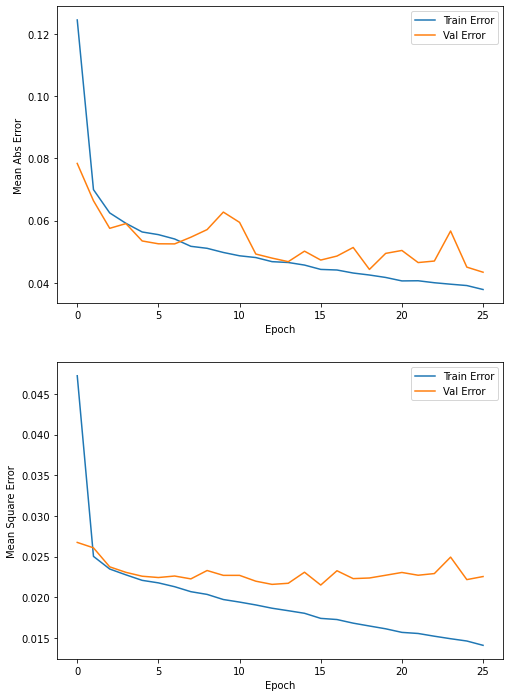

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    #plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    #plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
#테스트 세트를 통한 검증.

loss, mae, mse = model.evaluate(normed_X_test, y_test, verbose=2)

print("Test set - mean absolute error: {:5.2f} ".format(mae))

797/797 - 1s - loss: 0.0218 - mae: 0.0429 - mse: 0.0218
Test set - mean absolute error:  0.04 


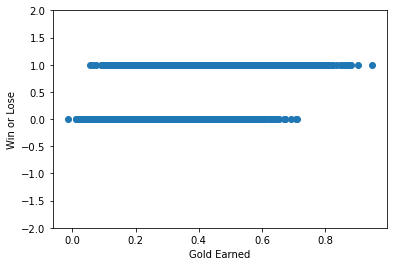

In [ ]:
plt.xlabel('Gold Earned')
plt.ylabel('Win or Lose')
plt.ylim([-2,2])

plt.scatter(normed_X_test['goldEarned'], y_test)

,assists,baronKills,bountyLevel,champExperience,championId,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,deaths,...,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced
0,0.284268,0.0,0.00000,0.115510,0.063205,0.069444,0.000000,0.006106,0.000000,0.136561,...,0.016425,0.021418,0.051676,0.000000,0.000000,0.363636,0.253863,0.038343,0.154188,0.117333
1,0.262965,0.0,0.00000,0.245626,0.099323,0.250000,0.000000,0.000000,0.000000,0.184228,...,0.013587,0.033143,0.144176,0.000000,0.000000,0.727273,0.495771,0.165523,0.582418,0.258536
2,0.482343,0.0,0.00000,0.461868,0.130926,0.194444,0.009578,0.034524,0.009578,0.223726,...,0.004332,0.040765,0.070079,0.111111,0.545455,0.454545,0.445606,0.078520,0.231552,0.200234
3,0.271022,0.0,0.09375,0.394048,0.582393,0.083333,0.055164,0.119349,0.055164,0.045569,...,0.000000,0.000000,0.071870,0.111111,0.272727,0.000000,0.193627,0.038384,0.137203,0.045678
4,0.154649,0.0,0.00000,0.303554,0.250564,0.055556,0.078428,0.121614,0.078428,0.222878,...,0.011412,0.036369,0.030820,0.111111,0.363636,0.818182,0.144684,0.031289,0.027961,0.063832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25493,0.321092,0.0,0.03125,0.378228,0.071106,0.194444,0.020342,0.033325,0.020342,0.115689,...,0.000000,0.000000,0.164227,0.111111,0.090909,0.090909,0.150202,0.119101,0.029027,0.093877
25494,0.139897,0.0,0.00000,0.358504,0.158014,0.000000,0.008397,0.193706,0.008397,0.392036,...,0.018671,0.049912,0.039047,0.111111,0.090909,0.727273,0.111053,0.000000,0.118037,0.005614
25495,0.155362,0.0,0.21875,0.459207,0.589165,0.152778,0.052965,0.309970,0.052965,0.163265,...,0.021495,0.030388,0.002075,0.333333,0.272727,0.454545,0.121402,0.027504,0.122892,0.032731
25496,0.040436,0.0,0.03125,0.229170,0.183973,0.041667,0.000000,0.000000,0.000000,0.203968,...,0.036966,0.097538,0.016262,0.000000,0.000000,0.272727,0.072223,0.038179,0.051177,0.048680


97.20762412738254 % accuracy


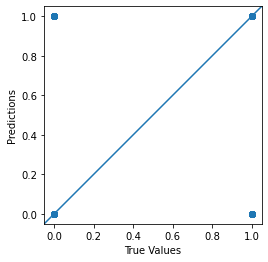

In [ ]:
### ACCURACY 계산 cell

#def un_norm_y(norm_y):
#    return (norm_y * train_stats_original_y['std']) + train_stats_original_y['mean']

normed_X_test_acc = normed_X_test.copy()
#normed_X_test_acc['assists'] = 0
display(normed_X_test)

#예측
test_predictions = model.predict(normed_X_test_acc).flatten()
#test_predictions = un_norm_y(test_predictions)


##### 승/패
error_count = 0
no_error_count = 0

for i in range(len(test_predictions)):
    if test_predictions[i] < 0.5:
        test_predictions[i] = 0
    else:
        test_predictions[i] = 1

for i in range(len(y_test)):
    if test_predictions[i] == y_test.to_numpy()[i]:
        no_error_count = no_error_count + 1
    else:
        error_count = error_count + 1

print(no_error_count/(no_error_count+error_count) * 100 , "% accuracy")



##### 티어 카테고리
# pred = []
# true = []
# for i in range(len(test_predictions)):
#     pred.append(test_predictions[i])
#     true.append(y_test.to_numpy()[i])

# pred = pd.DataFrame(pred)
# true = pd.DataFrame(true)
# pred_true = pd.concat([pred, true], axis = 1)
# display(pred_true)

#####
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-10, 10], [-10, 10])

In [ ]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
model.save("my_model_97.2")


INFO:tensorflow:Assets written to: my_model_97.2\assets


In [ ]:

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model_97.2")

# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
#reconstructed_model.fit(test_input, test_target)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 

,0,0
0,assists,92.885717
1,baronKills,97.164483
2,bountyLevel,96.340889
3,champExperience,76.033414
4,championId,97.211546
...,...,...
62,turretsLost,64.773708
63,visionScore,97.105655
64,visionWardsBoughtInGame,97.160562
65,wardsKilled,97.266452


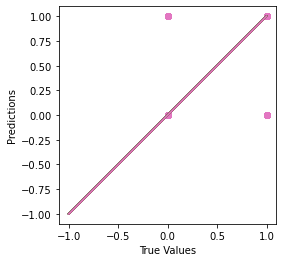

In [ ]:
##### 가중치 비교를 위한 cell  ---- 승패



columns = normed_X_test_acc.columns
acc_for_columns = []
    
for i in range(len(columns)):
    normed_X_test_acc = normed_X_test.copy()
    normed_X_test_acc[columns[i]] = 0
    #display(normed_X_test_acc.head())
    #display(normed_X_test_acc)
    
    print(i,end=' ')

    #예측
    test_predictions = reconstructed_model.predict(normed_X_test_acc).flatten()
    #test_predictions = un_norm_y(test_predictions)

    error_count = 0
    no_error_count = 0

    for i in range(len(test_predictions)):
        if test_predictions[i] < 0.5:
            test_predictions[i] = 0
        else:
            test_predictions[i] = 1

    for i in range(len(y_test)):
        if test_predictions[i] == y_test.to_numpy()[i]:
            no_error_count = no_error_count + 1
        else:
            error_count = error_count + 1
            
    accuracy = no_error_count/(no_error_count+error_count) * 100
    #print(accuracy , "% accuracy")
    
    acc_for_columns.append(accuracy)

    plt.scatter(y_test, test_predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    #plt.xlim([0,plt.xlim()[1]])
    #plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-1, 1], [-1, 1])
    
columns = pd.DataFrame(columns)
acc_for_columns = pd.DataFrame(acc_for_columns)

df_acc = pd.concat([columns, acc_for_columns], axis = 1)
display(df_acc)

In [ ]:
df_acc.to_csv('Accuracy_for_without_feature.csv', mode='w', encoding="utf-8-sig")

4074